# Live session

## Wednesday 16th March 2022

#### Distributions examples

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

In [ ]:
normal = tfd.Normal(loc=[-0.5, 0., 0.5], scale=[1.])
normal

<tfp.distributions.Normal 'Normal' batch_shape=[3] event_shape=[] dtype=float32>

In [ ]:
normal.sample((2, 1))

<tf.Tensor: shape=(2, 1, 3), dtype=float32, numpy=
array([[[-1.5945035 , -1.1526645 ,  2.3130028 ]],

       [[-0.2854919 ,  1.4687488 , -0.04359776]]], dtype=float32)>

In [ ]:
samples = tf.zeros((10, 3))

In [ ]:
normal.log_prob(samples)

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385],
       [-1.0439385, -0.9189385, -1.0439385]], dtype=float32)>

In [ ]:
bernoulli = tfd.Bernoulli(probs=[[0.9, 0.2],
                                 [0.4, 0.1]])
bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[2, 2] event_shape=[] dtype=int32>

In [ ]:
bernoulli = tfd.Independent(bernoulli,
                           reinterpreted_batch_ndims=1)
bernoulli

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[2] event_shape=[2] dtype=int32>

In [ ]:
bernoulli.sample()

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0]], dtype=int32)>

In [ ]:
samples = tf.random.uniform((3, 2, 2),
                           minval=0,
                           maxval=2,
                           dtype=tf.int32)
samples

<tf.Tensor: shape=(3, 2, 2), dtype=int32, numpy=
array([[[0, 1],
        [1, 1]],

       [[0, 1],
        [0, 1]],

       [[1, 0],
        [0, 0]]], dtype=int32)>

In [ ]:
bernoulli.log_prob(samples)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-3.9120228 , -3.218876  ],
       [-3.9120228 , -2.8134108 ],
       [-0.3285041 , -0.61618614]], dtype=float32)>

#### Naive Bayes classifier example

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np

train_dataset = fetch_20newsgroups(subset='train')
test_dataset = fetch_20newsgroups(subset='test')

print(train_dataset['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [ ]:
train_dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
train_dataset['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
print(train_dataset['data'][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
class_names = np.array(train_dataset['target_names'])

In [ ]:
train_dataset['target'][0]

7

In [ ]:
class_names[7]

'rec.autos'

#### Data preprocessing

In [ ]:
n_documents = len(train_dataset['data'])
n_documents

11314

In [ ]:
count_vectorizer = CountVectorizer(input='content', 
                                   binary=True,
                                   max_df=0.25, 
                                   min_df=1.01/n_documents)

In [ ]:
x_train = count_vectorizer.fit_transform(train_dataset['data'])
x_test = count_vectorizer.transform(test_dataset['data'])

In [ ]:
x_train.shape, x_test.shape

((11314, 56365), (7532, 56365))

In [ ]:
x_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train = train_dataset['target']
y_test = test_dataset['target']
y_train

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
count_vectorizer.inverse_transform(x_train[0, :])

[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [ ]:
len(count_vectorizer.vocabulary_)
index2word = {value: key for key, value in count_vectorizer.vocabulary_.items()}
index2word

{31701: 'lerxst',
 53950: 'wam',
 51879: 'umd',
 54371: 'where',
 50255: 'thing',
 13607: 'car',
 42078: 'rac3',
 33453: 'maryland',
 15293: 'college',
 38822: 'park',
 1412: '15',
 54828: 'wondering',
 9213: 'anyone',
 16472: 'could',
 21034: 'enlighten',
 45006: 'saw',
 17643: 'day',
 19514: 'door',
 47623: 'sports',
 32330: 'looked',
 31356: 'late',
 5135: '60s',
 20173: 'early',
 5639: '70s',
 13411: 'called',
 12437: 'bricklin',
 19516: 'doors',
 54277: 'were',
 42523: 'really',
 46842: 'small',
 7905: 'addition',
 23639: 'front',
 12770: 'bumper',
 45705: 'separate',
 43490: 'rest',
 11973: 'body',
 49889: 'tellme',
 35014: 'model',
 36078: 'name',
 20995: 'engine',
 47438: 'specs',
 55820: 'years',
 41015: 'production',
 32954: 'made',
 26465: 'history',
 54347: 'whatever',
 28171: 'info',
 23782: 'funky',
 32332: 'looking',
 40028: 'please',
 33027: 'mail',
 50121: 'thanks',
 27557: 'il',
 12556: 'brought',
 36384: 'neighborhood',
 25411: 'guykuo',
 13716: 'carson',
 54034: 'wa

\begin{eqnarray}
p(C_k \mid x_1,\ldots,x_d) & = & \frac{p(C_k)p(x_1,\ldots,x_d \mid C_k)}{p(x_1,\ldots,x_d)}\\
& = & \frac{p(C_k) \prod_{i=1}^d p(x_i \mid C_k)}{p(x_1,\ldots,x_d)}\quad\text{(Naive Bayes assumption)}\\
& = & \frac{1}{Z}p(C_k) \prod_{i=1}^d p(x_i \mid C_k)
\end{eqnarray}
where $k\in\{0,\ldots,19\}$, $d=56,365$, $Z = \sum_{k=0}^{19} p(C_k) \prod_{i=1}^d p(x_i \mid C_k)$.

#### Class priors

In [ ]:
n_classes = 20

In [ ]:
counts = np.zeros(n_classes)
for c_k in range(n_classes):
    counts[c_k] = np.sum(np.where(y_train == c_k, 1, 0))
class_prior_probs = counts / np.sum(counts)
class_prior_probs

array([0.04242531, 0.05161747, 0.05223617, 0.05214778, 0.05108715,
       0.05241294, 0.05170585, 0.05250133, 0.05285487, 0.05276648,
       0.05303164, 0.05258971, 0.05223617, 0.05250133, 0.05241294,
       0.05294326, 0.04825879, 0.04984974, 0.04109952, 0.03332155])

In [ ]:
class_priors = tfd.Categorical(probs=class_prior_probs.astype(np.float32))
class_priors

<tfp.distributions.Categorical 'Categorical' batch_shape=[] event_shape=[] dtype=int32>

In [ ]:
class_priors.probs
class_names[class_priors.sample(10).numpy()]

array(['alt.atheism', 'talk.politics.mideast', 'comp.os.ms-windows.misc',
       'sci.space', 'sci.space', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'talk.politics.mideast',
       'comp.sys.ibm.pc.hardware', 'rec.motorcycles'], dtype='<U24')

#### Class conditional distributions

In [ ]:
# Compute smoothed class-conditional probabilities

vocab_size = x_train.shape[1]

alpha = 1e-6

theta = np.zeros([n_classes, vocab_size])
for c_k in range(n_classes):
    class_mask = (y_train == c_k)
    num_docs_in_class = class_mask.sum() 
    theta[c_k, :] = (x_train[class_mask, :].sum(axis=0) + alpha)/(num_docs_in_class + alpha*vocab_size)

In [ ]:
class_conditionals = tfd.Bernoulli(probs=theta)
class_conditionals

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[20, 56365] event_shape=[] dtype=int32>

In [ ]:
class_conditionals = tfd.Independent(class_conditionals,
                                    reinterpreted_batch_ndims=1)
class_conditionals

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [ ]:
class_conditionals.mean()

<tf.Tensor: shape=(20, 56365), dtype=float32, numpy=
array([[6.2492681e-03, 2.2913978e-02, 2.0830888e-09, ..., 2.0830888e-09,
        2.0830888e-09, 2.0830888e-09],
       [3.4243271e-02, 1.8833801e-02, 1.7121635e-09, ..., 1.7121635e-09,
        1.7121635e-09, 1.7121635e-09],
       [3.2145835e-02, 1.6918862e-02, 1.6918860e-09, ..., 1.6918860e-09,
        1.6918860e-09, 1.6918860e-09],
       ...,
       [5.1413305e-02, 1.4892130e-01, 1.7728743e-03, ..., 1.7728725e-09,
        1.7728725e-09, 1.7728725e-09],
       [3.4404434e-02, 6.4508311e-02, 2.1502771e-09, ..., 2.1502771e-09,
        2.1502771e-09, 2.1502771e-09],
       [1.0608496e-02, 1.8564867e-02, 2.6521234e-09, ..., 2.6521234e-09,
        2.6521234e-09, 2.6521234e-09]], dtype=float32)>

In [ ]:
most_probable_word_inx = tf.math.argmax(
    class_conditionals.mean(), axis=1
).numpy()

for j, ix in enumerate(most_probable_word_inx):
    print(f"Most probable word in {class_names[j]} is {index2word[ix]}")

Most probable word in alt.atheism is people
Most probable word in comp.graphics is graphics
Most probable word in comp.os.ms-windows.misc is windows
Most probable word in comp.sys.ibm.pc.hardware is thanks
Most probable word in comp.sys.mac.hardware is mac
Most probable word in comp.windows.x is window
Most probable word in misc.forsale is sale
Most probable word in rec.autos is car
Most probable word in rec.motorcycles is dod
Most probable word in rec.sport.baseball is he
Most probable word in rec.sport.hockey is ca
Most probable word in sci.crypt is clipper
Most probable word in sci.electronics is use
Most probable word in sci.med is reply
Most probable word in sci.space is space
Most probable word in soc.religion.christian is god
Most probable word in talk.politics.guns is people
Most probable word in talk.politics.mideast is people
Most probable word in talk.politics.misc is people
Most probable word in talk.religion.misc is he


In [ ]:
n_samples = 5
sample = class_conditionals.sample(n_samples)
sample.shape

TensorShape([5, 20, 56365])

In [ ]:
chosen_class = 15
class_names[chosen_class]

'soc.religion.christian'

In [ ]:
class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(5, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
tf.reduce_sum(class_sample, axis=1)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([151, 152, 139, 144, 132], dtype=int32)>

In [ ]:
count_vectorizer.inverse_transform(class_sample)

[array(['2000', '27', '35', '59', '6g3', 'absent', 'after', 'agreement',
        'alive', 'always', 'anger', 'another', 'anyone', 'anything',
        'back', 'because', 'before', 'begins', 'beliefs', 'bible', 'bit',
        'blessed', 'brilliant', 'burn', 'called', 'christ', 'con',
        'concerning', 'conservative', 'court', 'crime', 'cso', 'currency',
        'damasus', 'davis', 'days', 'dead', 'deficiencies', 'deleted',
        'differences', 'different', 'does', 'enormous', 'ever', 'faith',
        'far', 'finally', 'fires', 'first', 'fly', 'generic', 'give',
        'given', 'god', 'got', 'heart', 'his', 'inc', 'incidentally',
        'indicated', 'industrial', 'innocent', 'into', 'lengthy', 'light',
        'little', 'loop', 'mail', 'matter', 'mature', 'means', 'mediorce',
        'men', 'message', 'missed', 'moderator', 'monophysite', 'most',
        'ms', 'must', 'name', 'neither', 'normally', 'off', 'ofm', 'often',
        'ohio', 'order', 'parishioners', 'part', 'particular

#### Construct the model

In [ ]:
def predict(sample):
    # sample: (sample_shape, vocab_size)
    sample = tf.expand_dims(sample, axis=-2)
    joint_loglik = class_conditionals.log_prob(sample) + tf.math.log(class_priors.probs)
    log_z = tf.math.reduce_logsumexp(joint_loglik, axis=-1,
                                    keepdims=True)
    return joint_loglik - log_z

In [ ]:
predict(x_test[:3].toarray())

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[-9.49610291e+01, -5.26178284e+01, -8.10107422e+01,
        -2.32004395e+01, -4.46169739e+01, -6.97951355e+01,
        -1.06442780e+02, -2.74658203e-04, -1.72193909e+01,
        -8.82634888e+01, -6.28374023e+01, -1.14682129e+02,
        -8.23193359e+00, -7.93068542e+01, -6.23884888e+01,
        -1.66114441e+02, -1.08976013e+02, -1.40609375e+02,
        -1.08618530e+02, -1.00119293e+02],
       [-1.64611176e+02, -2.18971558e+01, -7.43781738e+01,
        -4.18674622e+01, -5.43115845e+01, -4.62598877e+01,
        -1.17474579e+02, -1.37291779e+02, -1.08976349e+02,
        -8.35113831e+01, -1.10520599e+02,  0.00000000e+00,
        -7.51949158e+01, -1.25983734e+02, -1.35801300e+02,
        -2.17513947e+02, -1.30699493e+02, -2.08605621e+02,
        -1.11255219e+02, -2.07331573e+02],
       [ 0.00000000e+00, -1.61921982e+02, -1.79518845e+02,
        -1.94086685e+02, -1.60798813e+02, -1.91981064e+02,
        -1.90533066e+02, -1.86087662e+0

In [ ]:
n_test_examples = x_test.shape[0]

sample_inx = np.random.choice(n_test_examples)

print(test_dataset['data'][sample_inx])

From: ee92jks@brunel.ac.uk (Jonathan K Saville)
Subject: Re: triple des
Organization: Brunel University, Uxbridge, UK
X-Newsreader: TIN [version 1.1 PL9]
Lines: 18

Richard Lucock (rmal@jet.uk) wrote:
: I have seen various references to 'triple des' recently. Could anyone
: tell me what it is ? From context, I would guess that it means
: encrypting each block 3 times, with a different key each time, but
: I'd like to be sure.

: Replies by email preferred - our news is unreliable.

Could people replying to the above question post their responses here
as well, as I'm sure others (including myself) would like to hear them.

Thanks.

Jon
--
#      Jon Saville       #   Who alive can say, 'Thou art no   | Keats,
#  ee92jks@brunel.ac.uk  #  Poet, may'st not tell thy dreams?' | 1819
     PGP 2.2 public key available upon request or by finger



tf.Tensor(
[ -82.47876  -125.230225 -227.27032   -86.696594 -148.52124  -142.30774
 -153.40344  -135.29614  -114.37305  -149.93127  -208.60828     0.
 -122.21179  -102.10724  -132.47858  -166.46954  -138.0841   -198.29028
 -178.92993  -109.73343 ], shape=(20,), dtype=float32)


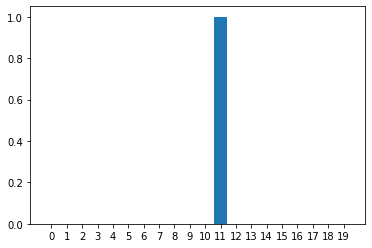

In [ ]:
import matplotlib.pyplot as plt

feature_vector = x_test[sample_inx].toarray()[0]
print(predict(feature_vector))
plt.bar(np.arange(20), tf.math.exp(predict(feature_vector)))
plt.xticks(np.arange(20))
plt.show()

In [ ]:
predicted_class = class_names[tf.math.argmax(predict(feature_vector)).numpy()]
print("Predicted: {}".format(predicted_class))
print("True label: {}".format(class_names[y_test[sample_inx]]))

Predicted: sci.crypt
True label: sci.crypt
